In [1]:
import tensorflow as tf
print(tf.__version__)

2.1.0


In [2]:
from sklearn.datasets import load_breast_cancer

In [3]:
data = load_breast_cancer()

In [4]:
type(data)

sklearn.utils.Bunch

In [5]:
data.keys()

dict_keys(['data', 'target', 'target_names', 'DESCR', 'feature_names', 'filename'])

In [6]:
data.data.shape

(569, 30)

In [7]:
data.target

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0,
       1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0,
       1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1,
       1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 1, 0,
       0, 1, 0, 0, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 0, 1, 1, 1,
       1, 0, 1, 1, 0, 0, 0, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 0, 0, 1, 0, 0,
       0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0,
       1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 1, 0, 0, 1, 0, 1, 1,
       1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 0, 1, 1, 0, 1, 0, 0, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0,

In [8]:
data.target_names

array(['malignant', 'benign'], dtype='<U9')

In [9]:
data.feature_names

array(['mean radius', 'mean texture', 'mean perimeter', 'mean area',
       'mean smoothness', 'mean compactness', 'mean concavity',
       'mean concave points', 'mean symmetry', 'mean fractal dimension',
       'radius error', 'texture error', 'perimeter error', 'area error',
       'smoothness error', 'compactness error', 'concavity error',
       'concave points error', 'symmetry error',
       'fractal dimension error', 'worst radius', 'worst texture',
       'worst perimeter', 'worst area', 'worst smoothness',
       'worst compactness', 'worst concavity', 'worst concave points',
       'worst symmetry', 'worst fractal dimension'], dtype='<U23')

In [10]:
len(data.feature_names)

30

In [11]:
from sklearn.model_selection import train_test_split

X_train, X_test, Y_train, Y_test = train_test_split(data.data, data.target, test_size=0.33)

In [12]:
X,D = X_train.shape

In [13]:
print(X,D)

381 30


In [14]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [15]:
model = tf.keras.models.Sequential([
    tf.keras.layers.Input(shape=(D,)),
    tf.keras.layers.Dense(1, activation='sigmoid')
])

In [16]:
model.compile(optimizer='adam',
             loss='binary_crossentropy',
             metrics=['accuracy'])

In [17]:
r = model.fit(X_train, Y_train, validation_data=(X_test, Y_test), epochs=100)

Train on 381 samples, validate on 188 samples
Epoch 1/100
381/381 [==============================] - 1s 3ms/sample - loss: 0.7661 - accuracy: 0.5328 - val_loss: 0.7150 - val_accuracy: 0.5585
Epoch 2/100
381/381 [==============================] - 0s 155us/sample - loss: 0.6878 - accuracy: 0.6142 - val_loss: 0.6488 - val_accuracy: 0.6596
Epoch 3/100
381/381 [==============================] - 0s 68us/sample - loss: 0.6212 - accuracy: 0.6640 - val_loss: 0.5918 - val_accuracy: 0.7234
Epoch 4/100
381/381 [==============================] - 0s 62us/sample - loss: 0.5653 - accuracy: 0.7323 - val_loss: 0.5422 - val_accuracy: 0.7553
Epoch 5/100
381/381 [==============================] - 0s 58us/sample - loss: 0.5173 - accuracy: 0.7795 - val_loss: 0.5004 - val_accuracy: 0.7926
Epoch 6/100
381/381 [==============================] - 0s 60us/sample - loss: 0.4780 - accuracy: 0.8163 - val_loss: 0.4641 - val_accuracy: 0.8404
Epoch 7/100
381/381 [==============================] - 0s 70us/sample - loss: 

381/381 [==============================] - 0s 65us/sample - loss: 0.1281 - accuracy: 0.9816 - val_loss: 0.1284 - val_accuracy: 0.9734
Epoch 57/100
381/381 [==============================] - 0s 64us/sample - loss: 0.1266 - accuracy: 0.9790 - val_loss: 0.1272 - val_accuracy: 0.9734
Epoch 58/100
381/381 [==============================] - 0s 65us/sample - loss: 0.1253 - accuracy: 0.9790 - val_loss: 0.1260 - val_accuracy: 0.9734
Epoch 59/100
381/381 [==============================] - 0s 58us/sample - loss: 0.1238 - accuracy: 0.9790 - val_loss: 0.1248 - val_accuracy: 0.9734
Epoch 60/100
381/381 [==============================] - 0s 64us/sample - loss: 0.1225 - accuracy: 0.9764 - val_loss: 0.1238 - val_accuracy: 0.9734
Epoch 61/100
381/381 [==============================] - 0s 60us/sample - loss: 0.1211 - accuracy: 0.9764 - val_loss: 0.1227 - val_accuracy: 0.9734
Epoch 62/100
381/381 [==============================] - 0s 66us/sample - loss: 0.1199 - accuracy: 0.9764 - val_loss: 0.1217 - val_a

In [18]:
print("Train score:", model.evaluate(X_train,Y_train))
print("Test score:", model.evaluate(X_test,Y_test ))

381/381 [==============================] - 0s 25us/sample - loss: 0.0910 - accuracy: 0.9816
Train score: [0.090976578552579, 0.9816273]
188/188 [==============================] - 0s 36us/sample - loss: 0.0985 - accuracy: 0.9734
Test score: [0.09852134436368942, 0.9734042]


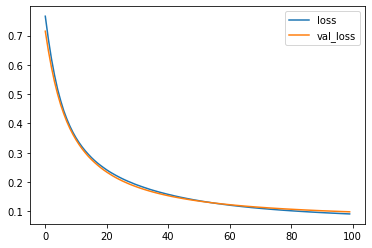

In [20]:
import matplotlib.pyplot as plt

plt.plot(r.history['loss'], label='loss')
plt.plot(r.history['val_loss'], label='val_loss')

plt.legend()
plt.show()

In [43]:
model.save('linearclassifier.h5')

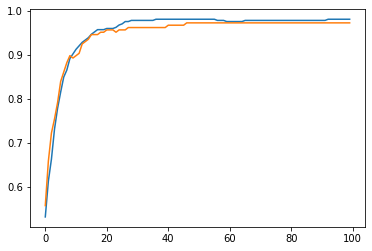

In [21]:
plt.plot(r.history['accuracy'],label='accuracy')
plt.plot(r.history['val_accuracy'],label='accuracy')
plt.show()

In [22]:
P = model.predict(X_test)
print(P)

[[9.41626847e-01]
 [8.83841813e-01]
 [9.94697928e-01]
 [8.80653560e-01]
 [7.99721539e-01]
 [1.16050076e-04]
 [1.86038822e-01]
 [7.99463272e-01]
 [9.94731307e-01]
 [8.79597306e-01]
 [8.41439784e-01]
 [9.91040766e-01]
 [9.49921310e-01]
 [1.36811230e-02]
 [9.91112649e-01]
 [9.97605920e-01]
 [9.90281463e-01]
 [4.78520133e-02]
 [9.99560773e-01]
 [1.88243221e-02]
 [9.99848247e-01]
 [4.50970262e-01]
 [3.78380995e-04]
 [9.77593899e-01]
 [2.38799714e-02]
 [9.86235559e-01]
 [9.84060943e-01]
 [4.21978474e-01]
 [9.49139714e-01]
 [7.76879191e-01]
 [8.60345492e-04]
 [8.24009538e-01]
 [9.93624687e-01]
 [1.89499755e-04]
 [9.98539567e-01]
 [2.15281148e-06]
 [1.22916608e-04]
 [9.98193204e-01]
 [9.94634151e-01]
 [9.87545788e-01]
 [8.21591735e-01]
 [9.18385863e-01]
 [9.32178974e-01]
 [6.69843256e-01]
 [3.92565191e-01]
 [9.93389130e-01]
 [9.97366369e-01]
 [8.03310648e-02]
 [9.89875734e-01]
 [9.84619439e-01]
 [9.96381402e-01]
 [7.08811954e-02]
 [4.94730310e-04]
 [9.77674305e-01]
 [5.75210061e-03]
 [9.653249

In [23]:
import numpy as np

In [24]:
P = np.round(P).flatten()
print(P)

[1. 1. 1. 1. 1. 0. 0. 1. 1. 1. 1. 1. 1. 0. 1. 1. 1. 0. 1. 0. 1. 0. 0. 1.
 0. 1. 1. 0. 1. 1. 0. 1. 1. 0. 1. 0. 0. 1. 1. 1. 1. 1. 1. 1. 0. 1. 1. 0.
 1. 1. 1. 0. 0. 1. 0. 1. 1. 1. 1. 0. 1. 1. 1. 1. 1. 0. 1. 1. 1. 1. 1. 1.
 0. 0. 1. 1. 1. 1. 1. 1. 0. 0. 0. 1. 0. 1. 1. 1. 1. 1. 0. 1. 0. 0. 1. 1.
 0. 1. 1. 0. 1. 0. 0. 1. 1. 1. 1. 0. 1. 0. 1. 1. 1. 1. 0. 1. 1. 1. 1. 1.
 0. 1. 1. 1. 1. 0. 1. 0. 1. 1. 0. 0. 0. 0. 0. 1. 1. 1. 0. 1. 0. 0. 0. 1.
 0. 1. 0. 1. 1. 0. 1. 1. 0. 0. 1. 0. 1. 1. 1. 0. 1. 0. 1. 1. 1. 1. 1. 1.
 0. 0. 1. 1. 0. 1. 1. 1. 1. 0. 0. 1. 0. 0. 1. 0. 1. 1. 1. 1.]


In [26]:
print("Manually calculated accuracy:", np.mean(P == Y_test))
print("Evaluate accuracy:", model.evaluate(X_test,Y_test))

Manually calculated accuracy: 0.973404255319149
188/188 [==============================] - 0s 31us/sample - loss: 0.0985 - accuracy: 0.9734
Evaluate accuracy: [0.09852134436368942, 0.9734042]


In [27]:
model.save('linearclassifier.h5')

In [28]:
!ls

linearclassifier.h5		  TF2.0 Linear Classification.ipynb
TF2.0 Autoregressive Model.ipynb


In [29]:
model = tf.keras.models.load_model('linearclassifier.h5')

In [30]:
print(model.layers)
model.evaluate(X_test,Y_test)

188/188 [==============================] - 0s 311us/sample - loss: 0.0985 - accuracy: 0.9734


[0.09852134436368942, 0.9734042]